# Business Objective 

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

Dataset: https://drive.google.com/open?id=16RQztUqCfJOlbooHqYlJrp6Q7iL65uZB

In [1]:
#import the useful libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#read the dataset and check the first five rows
df = pd.read_csv(r"C:\Users\Aditi Saini\Downloads\application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#Check the shape of the dataframe
df.shape

(307511, 122)

In [4]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

## Data Handling and Cleaning

In [5]:
#percentage of null values in columns
x = ((df.isnull().sum()/len(df))*100).sort_values(ascending=False).head(60)
x

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [6]:
len((x>=30).index)

60

60 columns have more then 30% null values

In [7]:
#dropping columns having null values greater then 30%
df.drop((x>=30).index, axis=1, inplace = True)

In [8]:
df.shape

(307511, 62)

In [9]:
# We will remove unwanted columns from this dataset
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(unwanted,axis=1,inplace=True)

In [10]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
LIVE_REGION_NOT_WORK_REGION       0
REG_CITY_NOT_LIVE_CITY            0
REG_CITY_NOT_WORK_CITY            0
LIVE_CITY_NOT_WORK_CITY     

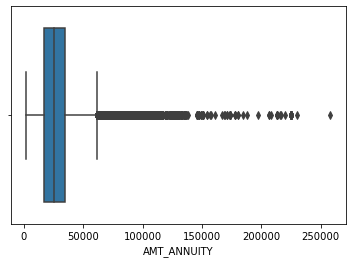

In [11]:
#Create a boxplot for the AMT_ANNUITY column
sns.boxplot(df.AMT_ANNUITY)
plt.show()

Considering outliers in AMT_ANNUITY column, will replace null values with it's median (median is not effected by outliers)

In [12]:
df.AMT_ANNUITY.fillna(df.AMT_ANNUITY.median(), inplace = True)

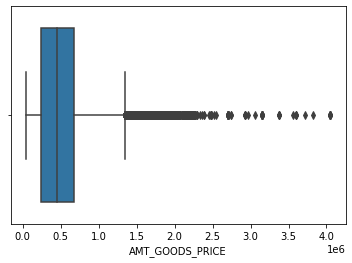

In [13]:
#Create a boxplot for the AMT_GOODS_PRICE column
sns.boxplot(df.AMT_GOODS_PRICE)
plt.show()

Again there are outliers in AMT_GOODS_PRICE column, will replace null values with it's median

In [14]:
df.AMT_GOODS_PRICE.fillna(df.AMT_GOODS_PRICE.median(), inplace = True)

In [15]:
#checking for XNA(null values) in CODE_GENDER column
df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [16]:
#replacing XNA values with 'F' as Female are in majority 
df.loc[df.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'

In [17]:
#checking for XNA(null values) in ORGANIZATION_TYPE column
df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [18]:
(len(df[df.ORGANIZATION_TYPE == 'XNA']) / len(df))*100

18.00716071945394

18% of ORGANIZATION_TYPE column have null values and replacing these null values with median is not a good option here. So, will drop the data where ORGANIZATION_TYPE have null values

In [19]:
df.drop(df.loc[df.ORGANIZATION_TYPE == 'XNA'].index,inplace=True)

In [20]:
#creating a new column for age as DAYS_BIRTH is given in days
df['Age'] = df.DAYS_BIRTH.apply(lambda x: int(-x/365))

In [21]:
df.Age.describe()

count    252137.000000
mean         39.963155
std          10.033179
min          20.000000
25%          32.000000
50%          39.000000
75%          48.000000
max          69.000000
Name: Age, dtype: float64

In [22]:
#dividing various age groups into bins
df['Age_bins'] = pd.cut(df.Age, [20,30,40,50,60,70], labels = ['20-30','30-40','40-50','50-60','60-70'])

In [23]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,Age,Age_bins
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,25,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,School,0.622246,0.0,0.0,45,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,Government,0.555912,0.0,0.0,52,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,Business Entity Type 3,0.650442,0.0,0.0,52,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,1,1,Religion,0.322738,0.0,0.0,54,50-60


In [24]:
#dividing income amount into bins
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
label = ['0-25000', '25000-50000','50000-75000','75000-100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df['AMT_INCOME_BINS'] = pd.cut(df.AMT_INCOME_TOTAL, bins, labels = label)

In [25]:
#diving credit amount into bins 
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
label = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df['AMT_CREDIT_BINS']=pd.cut(df['AMT_CREDIT'],bins,labels=label)

In [26]:
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,Age,Age_bins,AMT_INCOME_BINS,AMT_CREDIT_BINS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,Business Entity Type 3,0.262949,2.0,2.0,25,20-30,200000-225000,400000-450000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,School,0.622246,0.0,0.0,45,40-50,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,Government,0.555912,0.0,0.0,52,50-60,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,Business Entity Type 3,0.650442,0.0,0.0,52,50-60,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1,1,Religion,0.322738,0.0,0.0,54,50-60,100000-125000,500000-550000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,Other,0.354225,0.0,0.0,46,40-50,75000-100000,450000-500000
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,Business Entity Type 3,0.724000,0.0,0.0,37,30-40,150000-175000,900000 and above
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,1,1,Other,0.714279,0.0,0.0,51,50-60,350000-375000,900000 and above
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,Electricity,0.746644,0.0,0.0,39,30-40,125000-150000,400000-450000
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,...,0,0,Medicine,0.651862,0.0,0.0,27,20-30,100000-125000,650000-700000


In [27]:
df.TARGET.value_counts()

0    230302
1     21835
Name: TARGET, dtype: int64

In [28]:
#Calculating Imbalance Ratio, majority is target = 0 and minority is target = 1
round(len(df[df.TARGET==0])/len(df[df.TARGET==1]),2)

10.55

Imbalane Ratio in data is 10.55 

Now data seems good for univariate and bivariate analysis and visualization

## Univariate Analysis

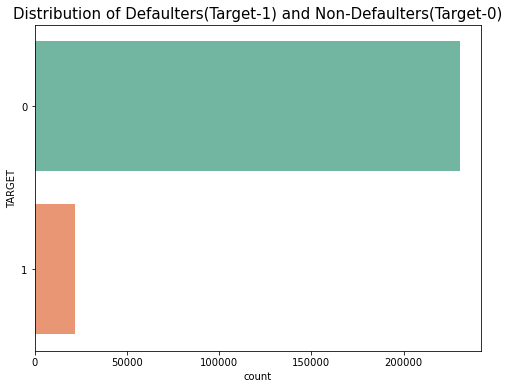

In [29]:
#number of Defaulter and non-defaulters in data
plt.figure(figsize=(8,6))
sns.countplot(data=df, y=df.TARGET, palette ="Set2")
plt.title("Distribution of Defaulters(Target-1) and Non-Defaulters(Target-0)", fontsize=15)
plt.show()

TARGET column have two values which indicate 0 as Non-defaulter and 1 as Defaulter

People who are able to repay their loan on time seems to be in majority  

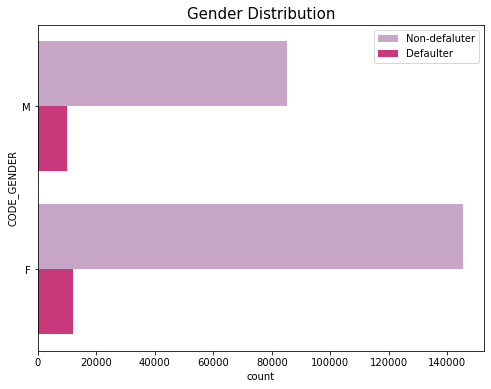

In [30]:
#plotting gender distribution
plt.figure(figsize=(8,6))
sns.countplot(data = df, y= df.CODE_GENDER, palette ="PuRd", hue= df.TARGET)
plt.title("Gender Distribution", fontsize=15)
plt.legend(['Non-defaluter','Defaulter'])
plt.show()

Female usually apply for more loan application as compared to men

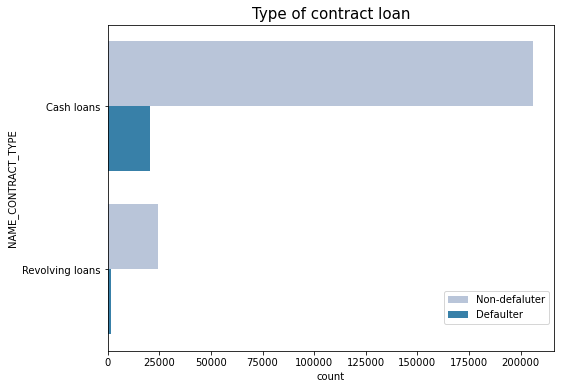

In [31]:
#plotting contract loan
plt.figure(figsize=(8,6))
sns.countplot(data = df, y= df.NAME_CONTRACT_TYPE, palette ="PuBu", hue= df.TARGET)
plt.title("Type of contract loan", fontsize=15)
plt.legend(['Non-defaluter','Defaulter'],bbox_to_anchor=(1,0.2))
plt.show()

More Defaulter can be seen those who apply for cash loan

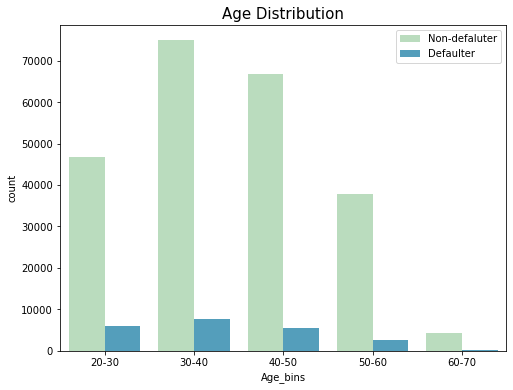

In [32]:
#plotting age distribution
plt.figure(figsize=(8,6))
sns.countplot(data = df, x= df.Age_bins, palette ="GnBu", hue= df.TARGET)
plt.title("Age Distribution", fontsize=15)
plt.legend(['Non-defaluter','Defaulter'])
plt.show()

Age group of 30-40 have majority of defaulter and age group of 60-70 have very less defaulters

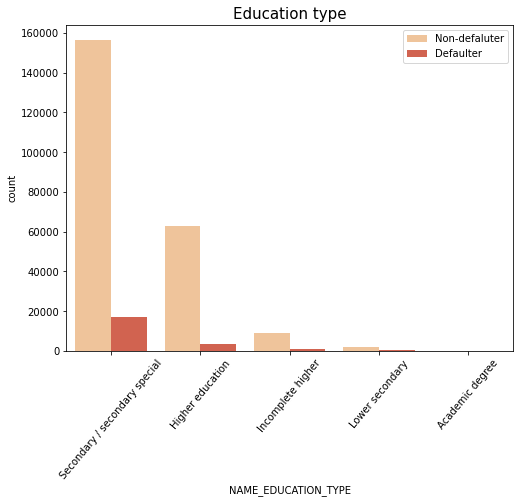

In [96]:
#plotting Education type
plt.figure(figsize=(8,6))
sns.countplot(data = df, x= df.NAME_EDUCATION_TYPE, palette ="OrRd", hue= df.TARGET)
plt.title("Education type", fontsize=15)
plt.xticks(rotation=50)
plt.legend(['Non-defaluter','Defaulter'])
plt.show()

People having secondary/secondary special education have highest ratio of defaulters

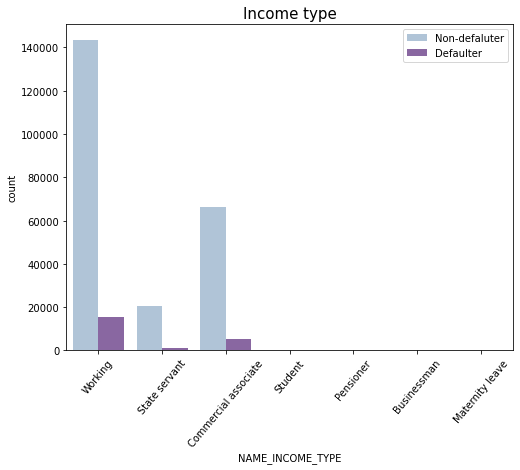

In [97]:
#plotting Income type
plt.figure(figsize=(8,6))
sns.countplot(data = df, x= df.NAME_INCOME_TYPE, palette ="BuPu", hue= df.TARGET)
plt.title("Income type", fontsize=15)
plt.xticks(rotation=50)
plt.legend(['Non-defaluter','Defaulter'])
plt.show()

People with working profession have highest no. of defaulters among all

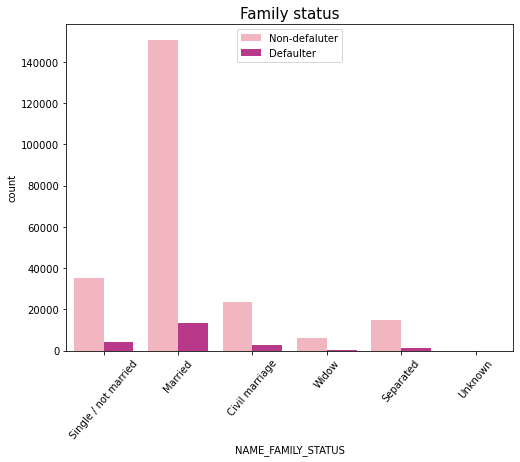

In [98]:
#plotting Family status
plt.figure(figsize=(8,6))
sns.countplot(data = df, x= df.NAME_FAMILY_STATUS, palette ="RdPu", hue= df.TARGET)
plt.title("Family status", fontsize=15)
plt.xticks(rotation=50)
plt.legend(['Non-defaluter','Defaulter'])
plt.show()

Married people have highest ration of defaulters among all

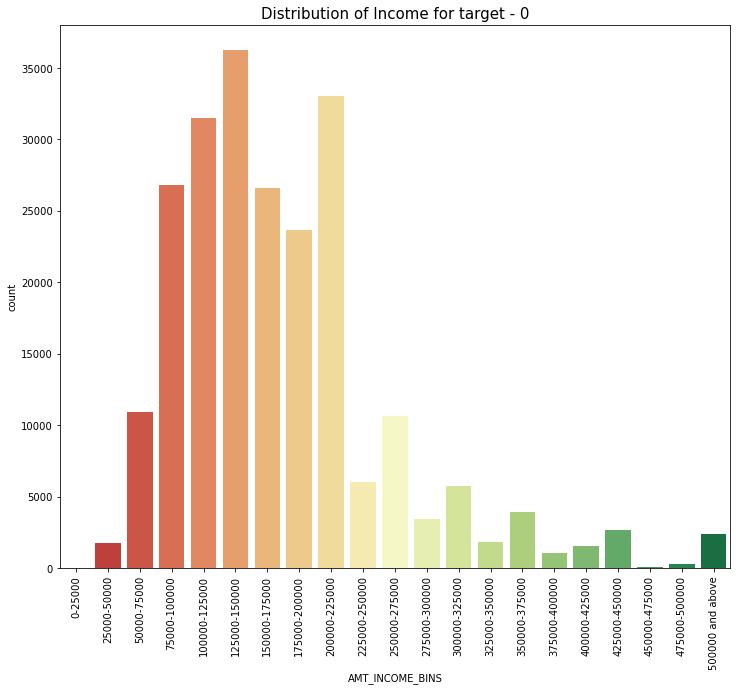

In [33]:
#plotting income for Non-defaulter category
plt.figure(figsize=(12,10))
sns.countplot(data = df[df.TARGET==0], x= df[df.TARGET==0].AMT_INCOME_BINS, palette ="RdYlGn")
plt.title("Distribution of Income for target - 0", fontsize=15)
plt.xticks(rotation= 90)
plt.show()

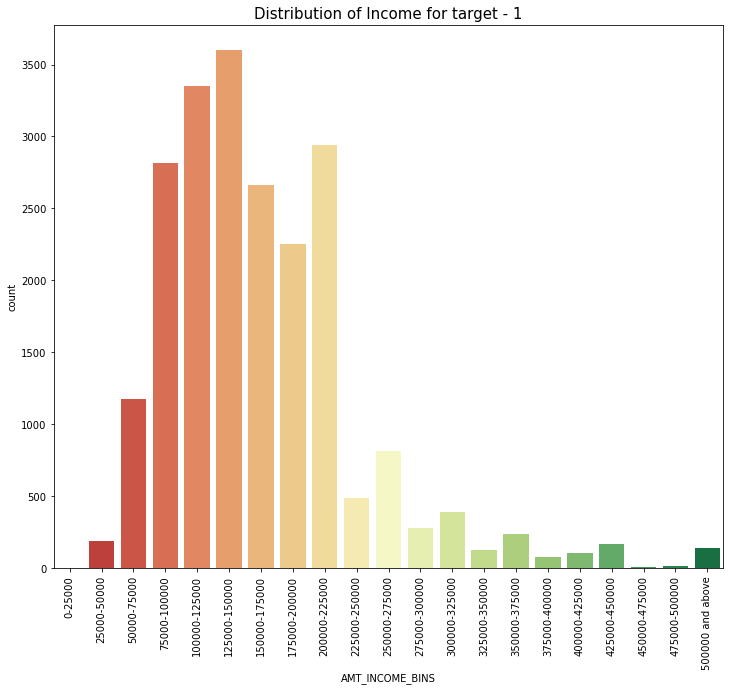

In [34]:
#plotting income for Defaulter category
plt.figure(figsize=(12,10))
sns.countplot(data = df[df.TARGET==1], x= df[df.TARGET==1].AMT_INCOME_BINS, palette ="RdYlGn")
plt.title("Distribution of Income for target - 1", fontsize=15)
plt.xticks(rotation= 90)
plt.show()

Not much difference seems between defaulter and non-defaulter category. Both have majority of Income ranging from 75000 to 225000

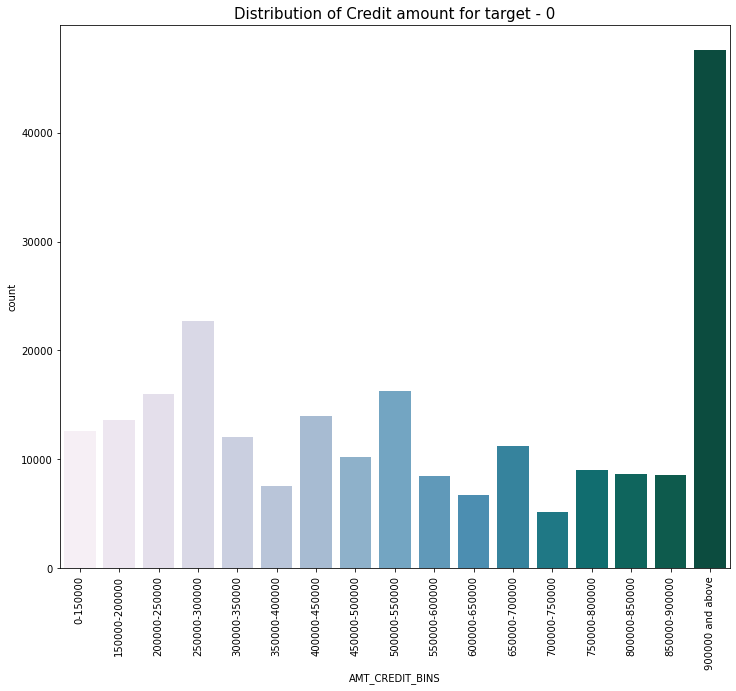

In [35]:
#plotting credit amount for Non-defaulter category
plt.figure(figsize=(12,10))
sns.countplot(data = df[df.TARGET==0], x= df[df.TARGET==0].AMT_CREDIT_BINS, palette ="PuBuGn")
plt.title("Distribution of Credit amount for target - 0", fontsize=15)
plt.xticks(rotation= 90)
plt.show()

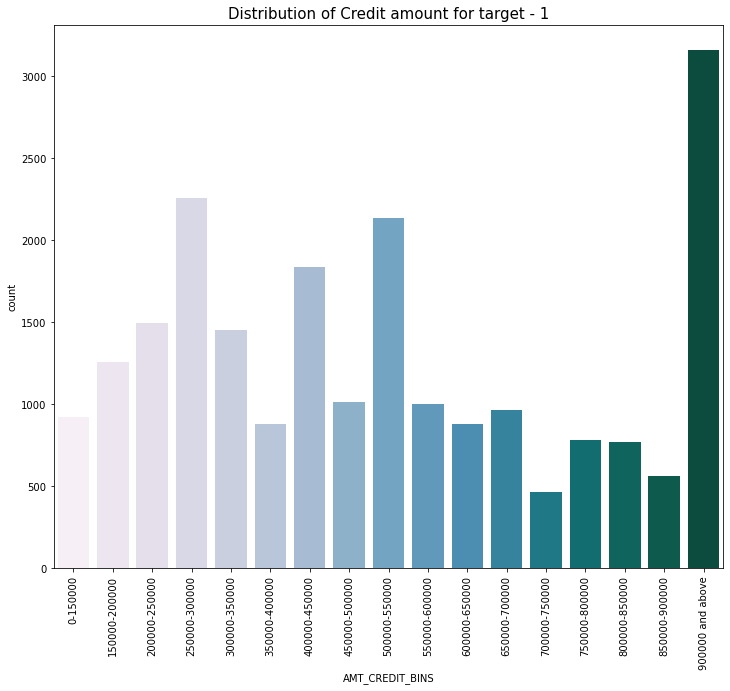

In [36]:
#plotting credit amount for Defaulter category
plt.figure(figsize=(12,10))
sns.countplot(data = df[df.TARGET==1], x= df[df.TARGET==1].AMT_CREDIT_BINS, palette ="PuBuGn")
plt.title("Distribution of Credit amount for target - 1", fontsize=15)
plt.xticks(rotation= 90)
plt.show()

Both defaulter and non-defaulter usually apply loan for 900000 and above credit amount

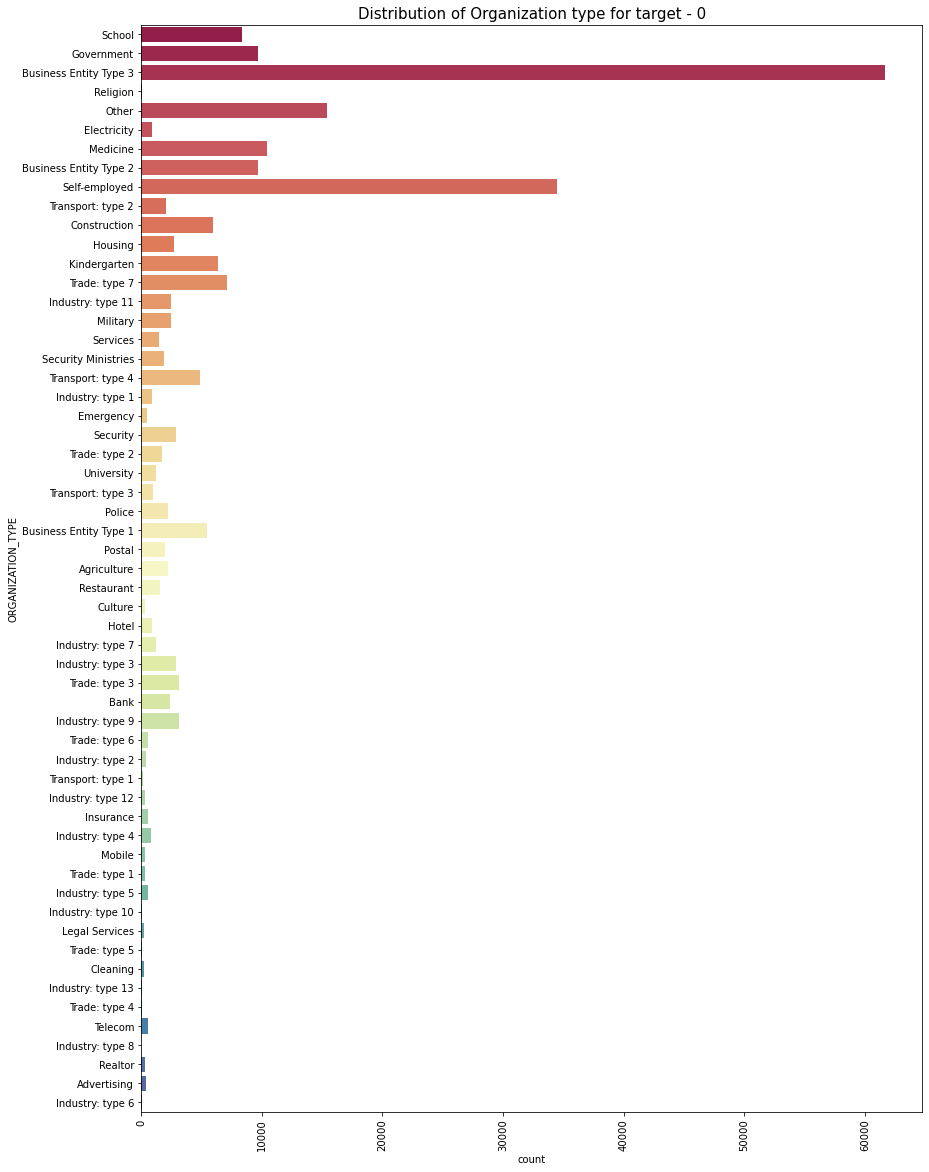

In [37]:
#plotting credit amount for Non-defaulter category
plt.figure(figsize=(14,20))
sns.countplot(data = df[df.TARGET==0], y= df[df.TARGET==0].ORGANIZATION_TYPE, palette ="Spectral")
plt.title("Distribution of Organization type for target - 0", fontsize=15)
plt.xticks(rotation= 90)
plt.show()

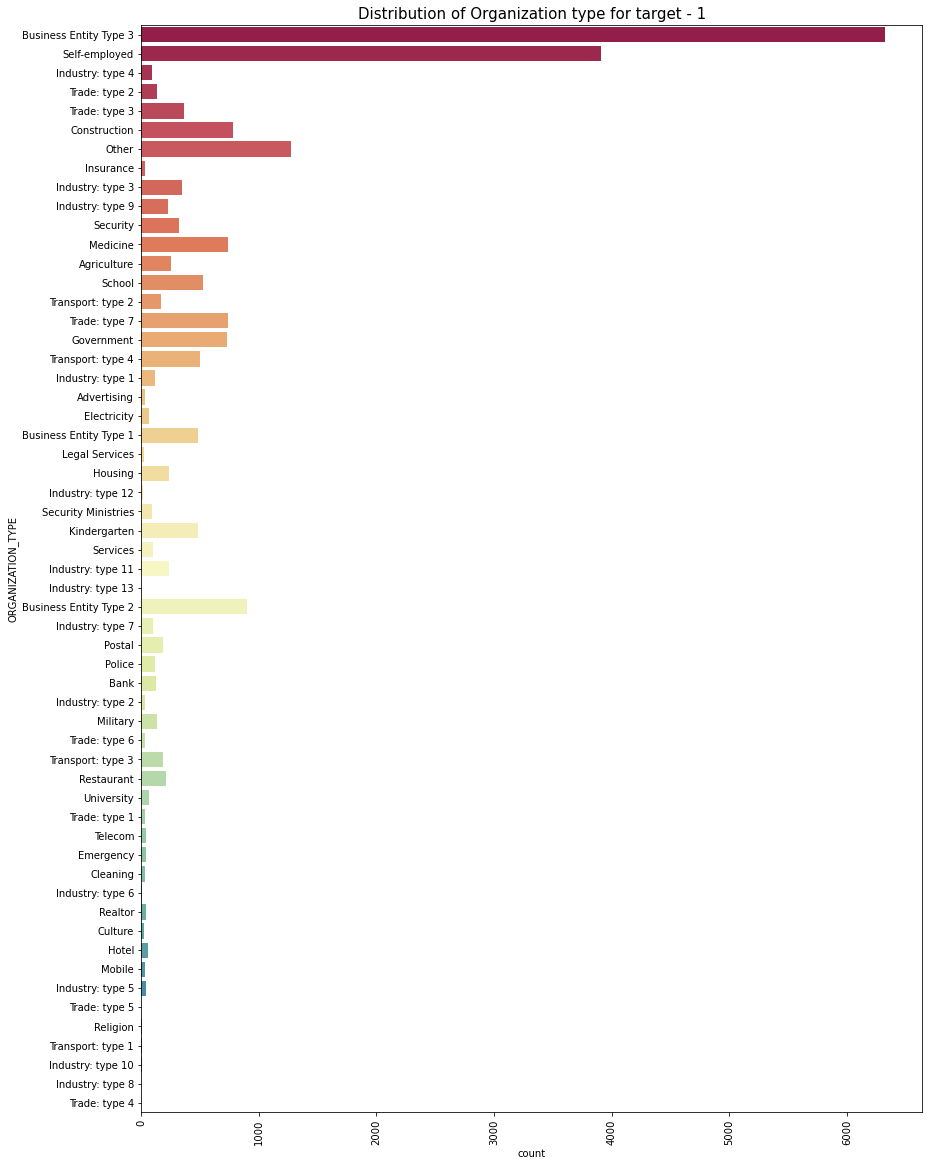

In [38]:
#plotting credit amount for Defaulter category
plt.figure(figsize=(14,20))
sns.countplot(data = df[df.TARGET==1], y= df[df.TARGET==1].ORGANIZATION_TYPE, palette ="Spectral")
plt.title("Distribution of Organization type for target - 1", fontsize=15)
plt.xticks(rotation= 90)
plt.show()

Business entity type 3 Organization type apply for loans in majority and simultaneously have more defaulters as well 

People who are self-employed comes at second place in list of defaulters 

## Bivariate and Multivariate Analysis

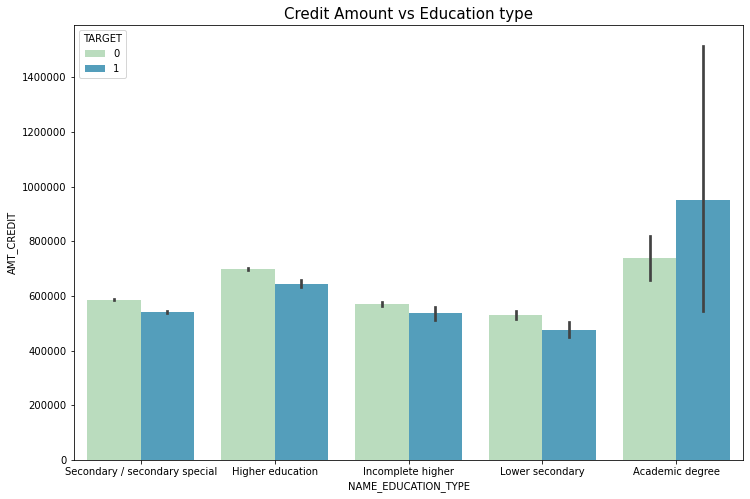

In [86]:
# Box plotting for credit amount with education type
plt.figure(figsize=(12,8))
sns.barplot(data =df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue ='TARGET',palette ="GnBu")
plt.yticks(ticks = [0,200000,400000,600000,800000,1000000,1200000,1400000],labels = [0,200000,400000,600000,800000,1000000,1200000,1400000])

plt.title('Credit Amount vs Education type', fontsize=15)
plt.show()

Defaulters with academic degree have highest average credit amount as compared to other education type

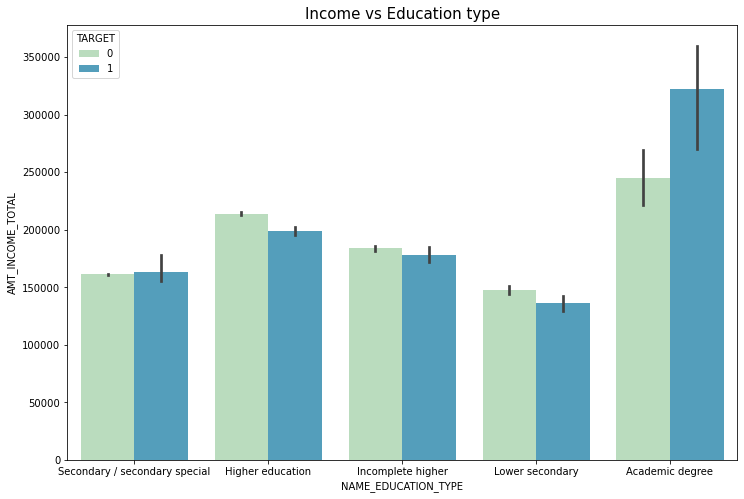

In [40]:
# Box plotting for Income with education type
plt.figure(figsize=(12,8))
sns.barplot(data =df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue ='TARGET',orient='v',palette ="GnBu")
plt.title('Income vs Education type', fontsize=15)
plt.show()

Defaulters with academic degree have highest average Income as compared to other education type

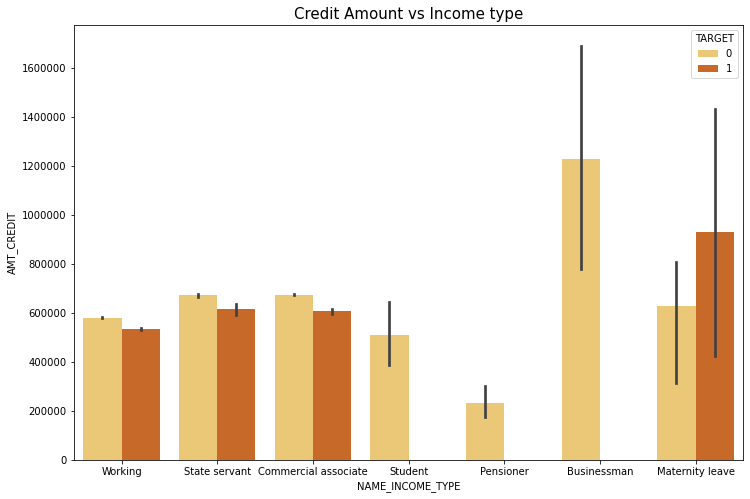

In [85]:
# Box plotting for credit amount with income type
plt.figure(figsize=(12,8))
sns.barplot(data =df, x='NAME_INCOME_TYPE',y='AMT_CREDIT',hue ='TARGET',orient='v',palette ="YlOrBr")
plt.yticks(ticks = [0,200000,400000,600000,800000,1000000,1200000,1400000,1600000],labels = [0,200000,400000,600000,800000,1000000,1200000,1400000,1600000])
plt.title('Credit Amount vs Income type', fontsize=15)
plt.show()

Non-defaulter Business man usually have highest average credit amount

Working people, state servent, Commercial associate have almost equal mean credit amount for Defaulter and non-defaulter

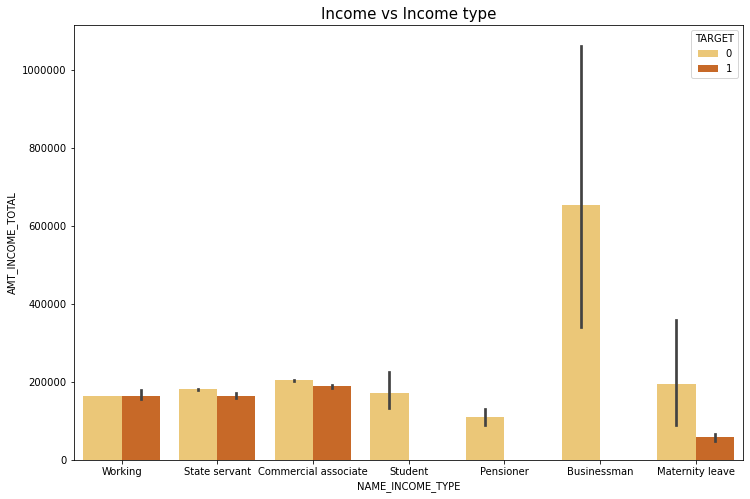

In [87]:
# Box plotting for Income with income type
plt.figure(figsize=(12,8))
sns.barplot(data =df, x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',hue ='TARGET',orient='v',palette ="YlOrBr")
plt.yticks(ticks = [0,200000,400000,600000,800000,1000000],labels = [0,200000,400000,600000,800000,1000000])
plt.title('Income vs Income type', fontsize=15)
plt.show()

Non-defaulter Business man have highest average income among all income types

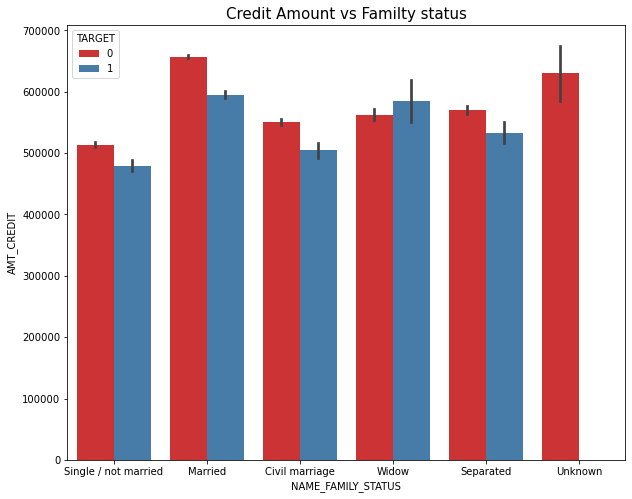

In [43]:
# Box plotting for credit amount with education type
plt.figure(figsize=(10,8))
sns.barplot(data =df, x='NAME_FAMILY_STATUS',y='AMT_CREDIT',hue ='TARGET',orient='v',palette ="Set1")
plt.title('Credit Amount vs Familty status', fontsize=15)
plt.show()

Married people have highest average credit amount

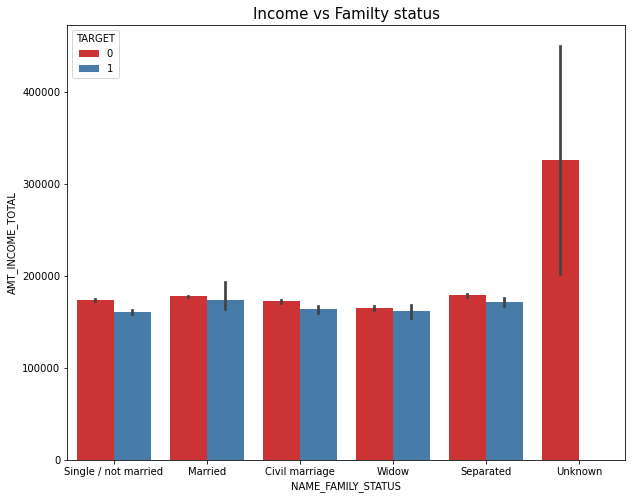

In [44]:
# Box plotting for Income with education type
plt.figure(figsize=(10,8))
sns.barplot(data =df, x='NAME_FAMILY_STATUS',y='AMT_INCOME_TOTAL',hue ='TARGET',orient='v',palette ="Set1")
plt.title('Income vs Familty status', fontsize=15)
plt.show()

Non-defaulter People with unknown family status have highest average income

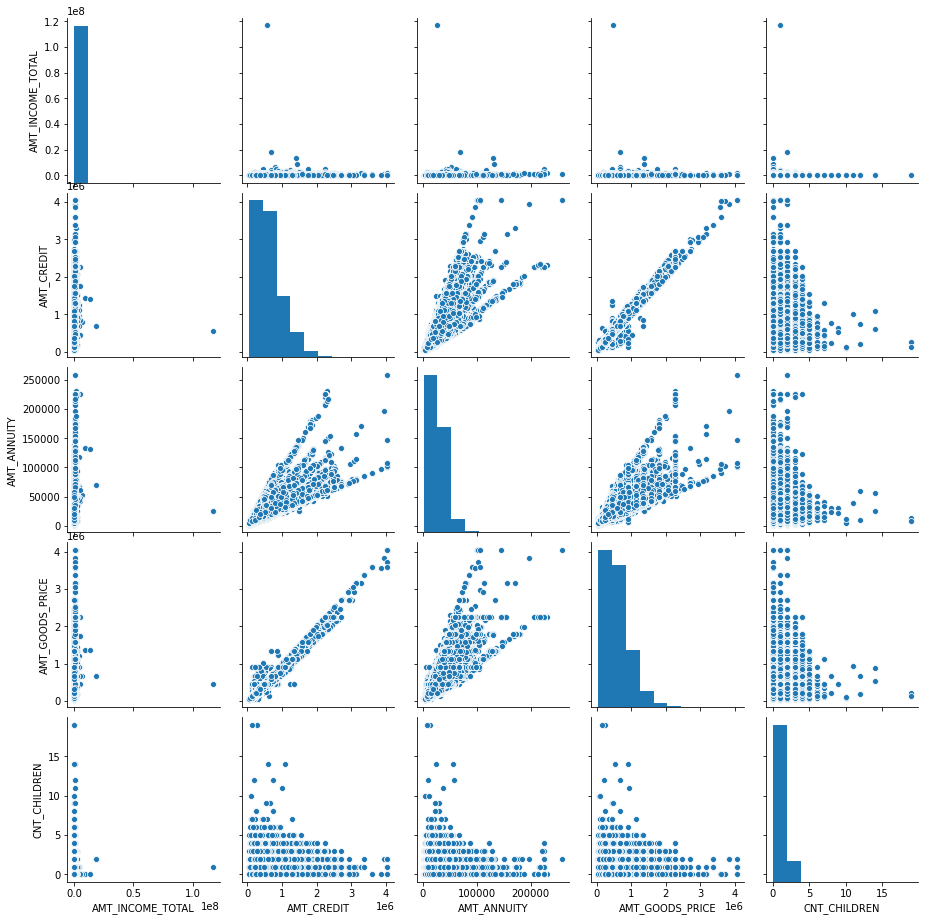

In [46]:
sns.pairplot(data=df, vars=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',"AMT_GOODS_PRICE",'CNT_CHILDREN'])
plt.show()

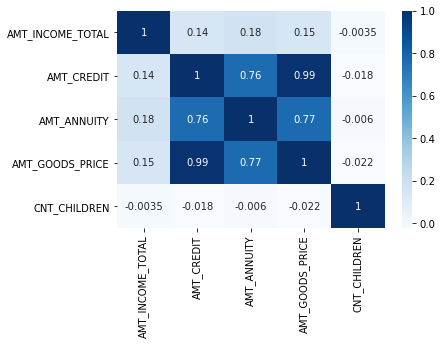

In [47]:
sns.heatmap(df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',"AMT_GOODS_PRICE",'CNT_CHILDREN']].corr(),annot=True,cmap="Blues")
plt.show()

Credit amount and Goods price have a strong positive correlation

Annuity amount have a positive correlation with  Credit amount and Goods price

In [53]:
# Reading the dataset of previous application
df1=pd.read_csv(r"C:\Users\Aditi Saini\Downloads\previous_application.csv")
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# listing the null values columns having more than 30%
emptycol1=df1.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

In [55]:
# Removing those 15 columns
emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
df1.drop(labels=emptycol1,axis=1,inplace=True)

df1.shape

(1670214, 22)

In [56]:
# Removing the column values of 'XNA' and 'XAP'
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df1.shape

(69635, 22)

In [57]:
# Now merging the Application dataset with previous appliaction dataset
new_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')

In [58]:
# Renaming the column names after merging
new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [59]:
# Removing unwanted columns for analysis
new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

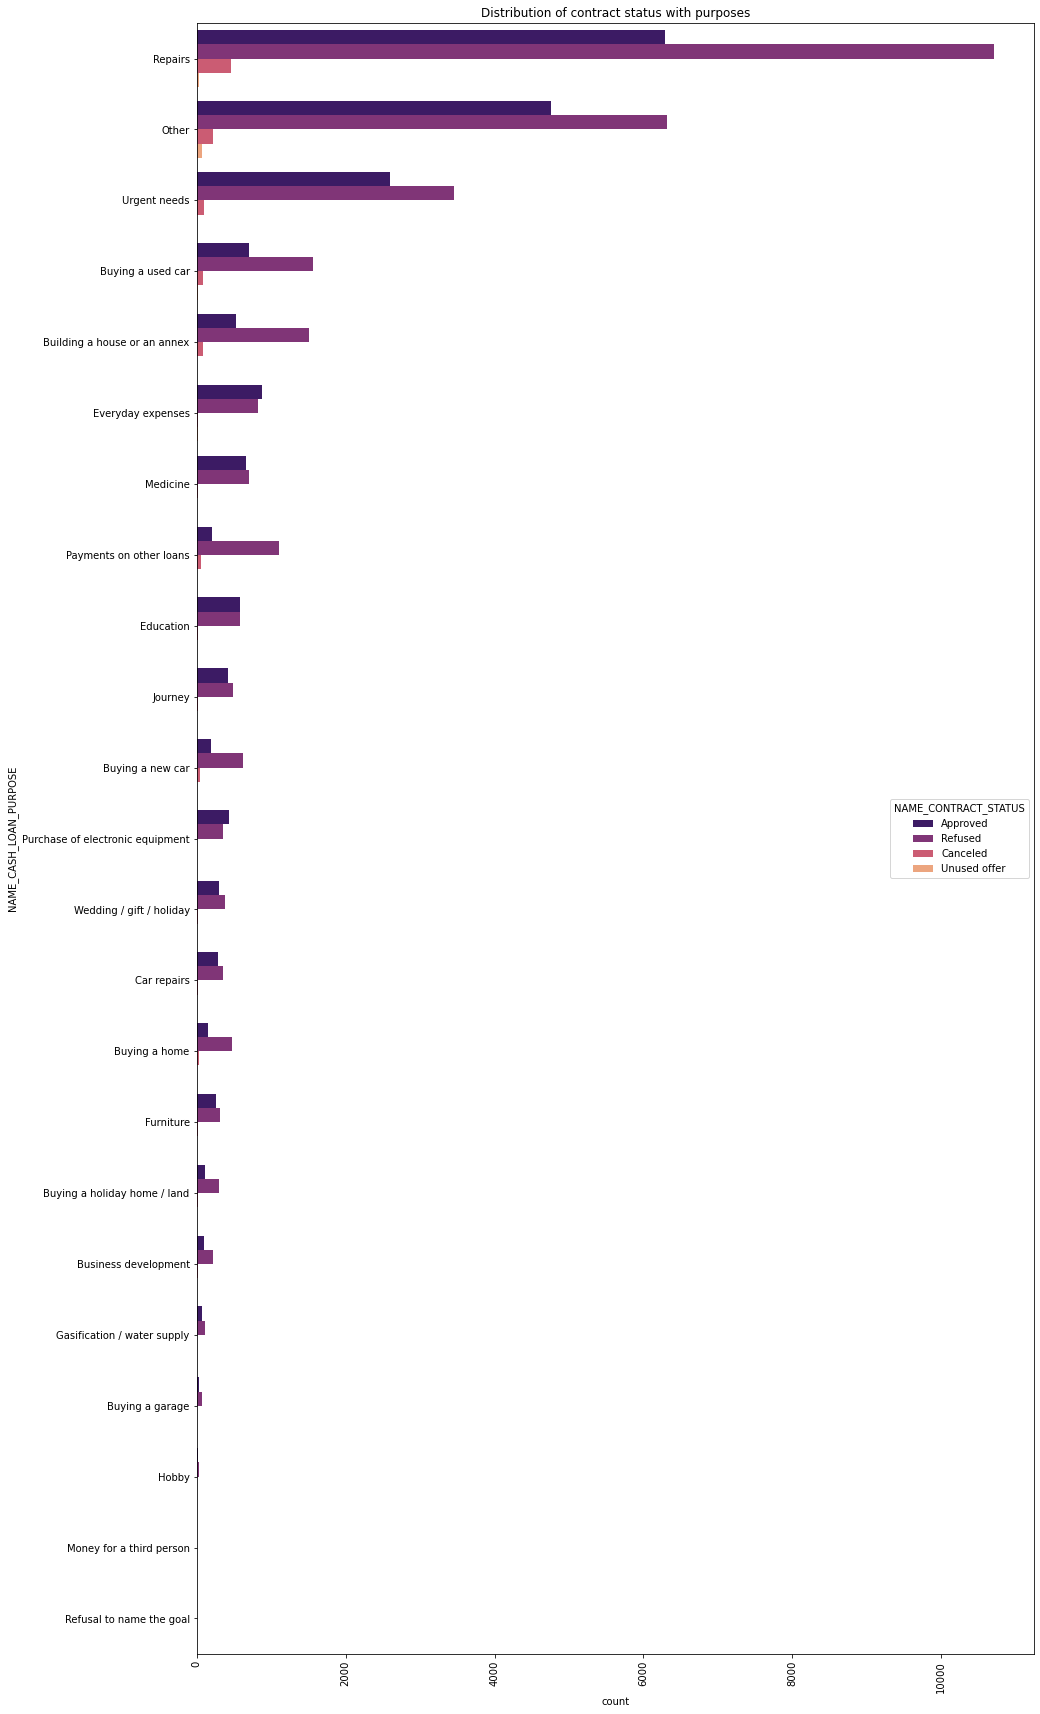

In [60]:
plt.figure(figsize=(15,30))
plt.xticks(rotation=90)
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

Most rejection of loans came from purpose 'repairs'

For education purposes we have equal number of approves and rejection

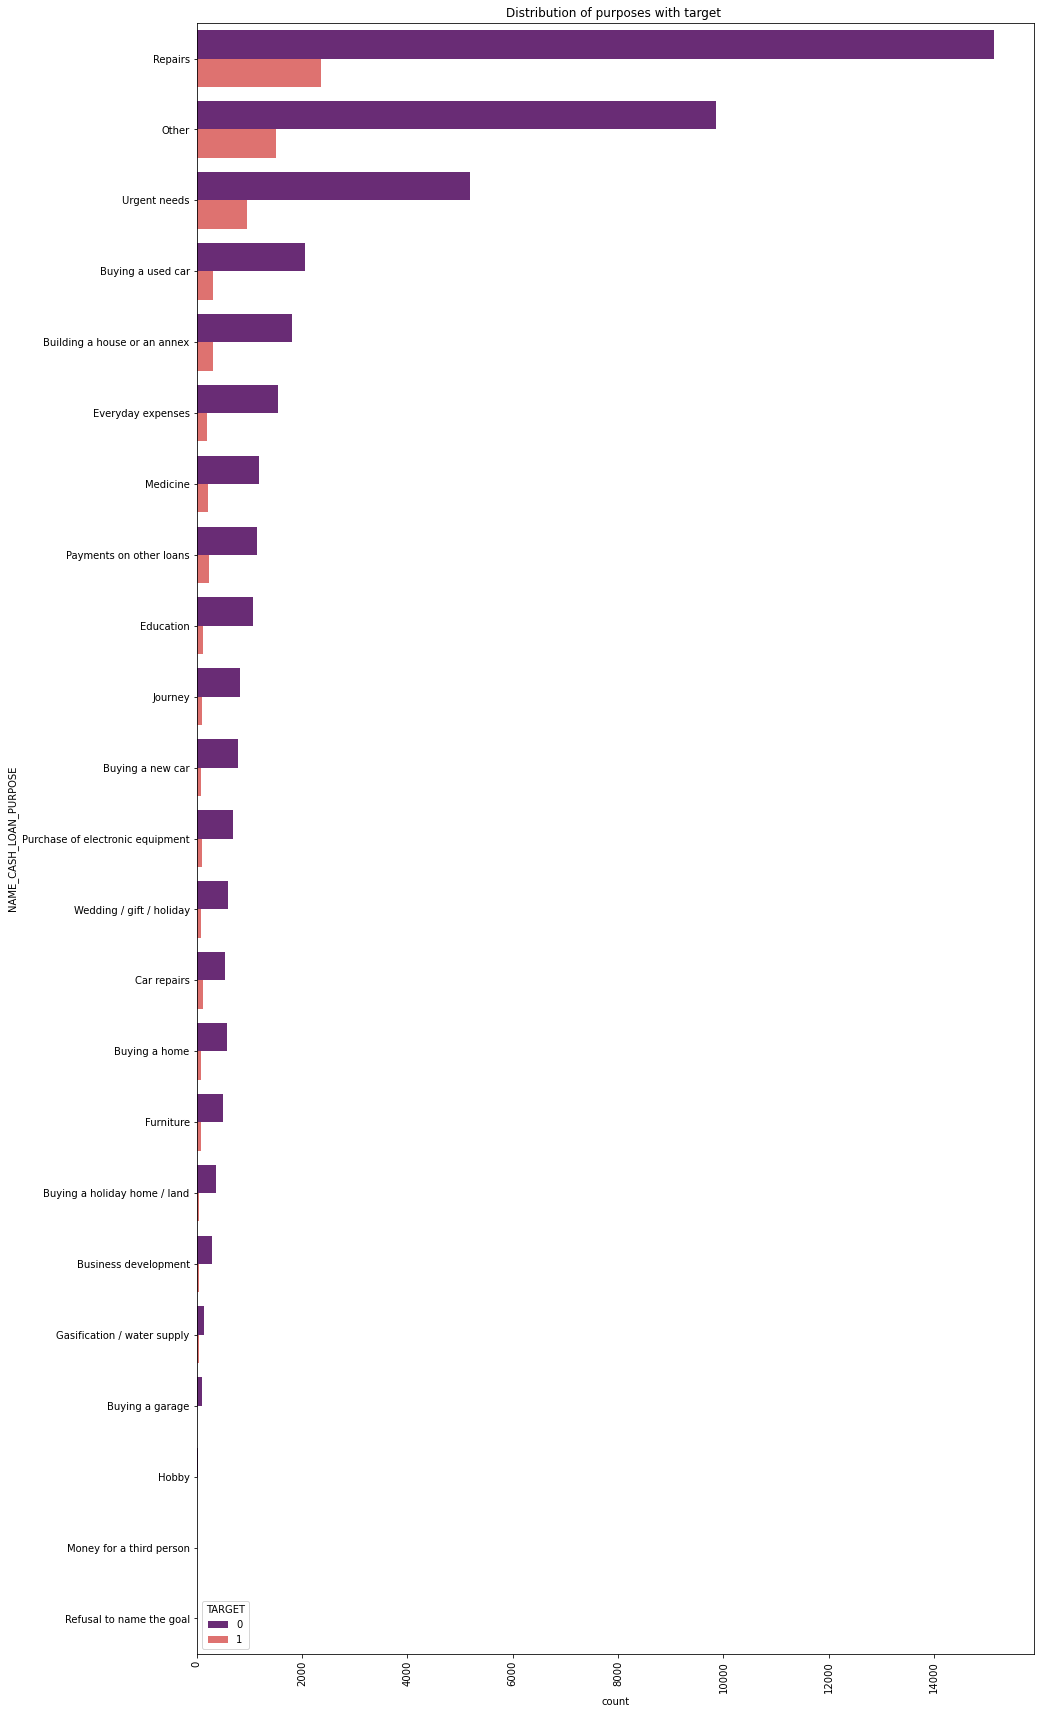

In [61]:
# Distribution of contract status
plt.figure(figsize=(15,30))
plt.xticks(rotation=90)
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma')

Loan purposes with 'Repairs' are facing more difficulites in payment on time.

There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education'

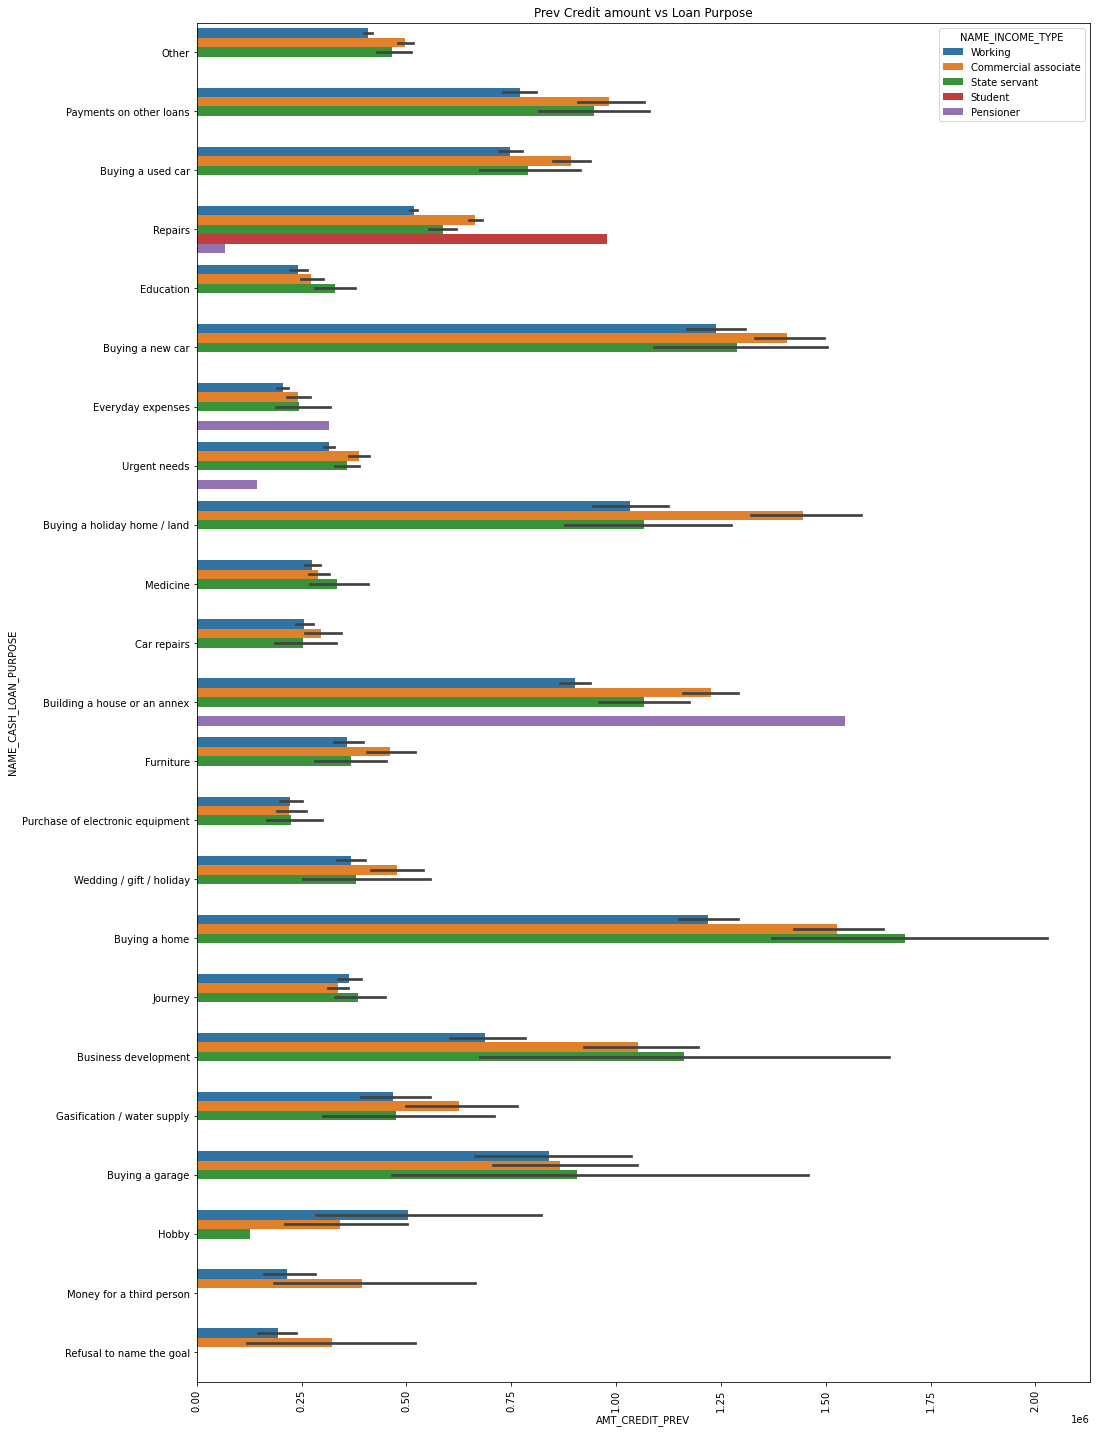

In [67]:
# Box plotting for Credit amount in logarithmic scale
plt.figure(figsize=(16,25))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',x='AMT_CREDIT_PREV')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.

Income type of state servants have a significant amount of credit applied

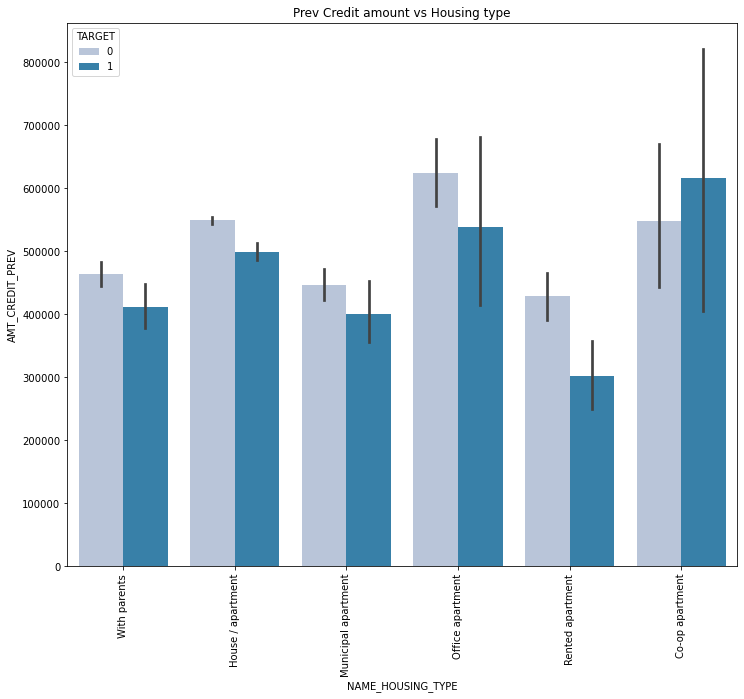

In [74]:
# Box plotting for Credit amount prev vs Housing
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE',palette = 'PuBu')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

## Conclusion

1.Females are more likely to repay loan on time. So,bank should focus more on their applications.

2.Bank should focus more on revolving loans as it have very less number of defaulters.

3.Bank should focus less on people having secondary/ secondary special education.

4.Banks should focus more on ‘Student’ ,’pensioner’ and ‘Businessman’.

5.People with working profession have highest number of defaulters. So, bank should try to focus more on other income types.

6.Business entity type 3 and self-employed Organization type have highest count in defaulters list. So, bank should take decision should be taken accordingly.